

# 使用Selenium操纵浏览器



王成军 

![](./images/author.png)



Selenium 是一套完整的web应用程序测试系统，包含了
- 测试的录制（selenium IDE）
- 编写及运行（Selenium Remote Control）
- 测试的并行处理（Selenium Grid）。

Selenium的核心Selenium Core基于JsUnit，完全由JavaScript编写，因此可以用于任何支持JavaScript的浏览器上。selenium可以模拟真实浏览器，自动化测试工具，支持多种浏览器，爬虫中主要用来解决JavaScript渲染问题。https://www.cnblogs.com/zhaof/p/6953241.html

上面我们知道了selenium支持很多的浏览器，但是如果想要声明并调用浏览器则需要：
https://pypi.org/project/selenium/

In [1]:
pip install -U selenium

Requirement already up-to-date: selenium in /opt/anaconda3/lib/python3.7/site-packages (3.141.0)
Note: you may need to restart the kernel to use updated packages.


## Webdriver
- 主要用的是selenium的Webdriver
- 我们可以通过下面的方式先看看Selenium.Webdriver支持哪些浏览器



In [2]:
from selenium import webdriver

In [3]:
help(webdriver) 

Help on package selenium.webdriver in selenium:

NAME
    selenium.webdriver

DESCRIPTION
    # Licensed to the Software Freedom Conservancy (SFC) under one
    # or more contributor license agreements.  See the NOTICE file
    # distributed with this work for additional information
    # regarding copyright ownership.  The SFC licenses this file
    # to you under the Apache License, Version 2.0 (the
    # "License"); you may not use this file except in compliance
    # with the License.  You may obtain a copy of the License at
    #
    #   http://www.apache.org/licenses/LICENSE-2.0
    #
    # Unless required by applicable law or agreed to in writing,
    # software distributed under the License is distributed on an
    # "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY
    # KIND, either express or implied.  See the License for the
    # specific language governing permissions and limitations
    # under the License.

PACKAGE CONTENTS
    android (package)
    blackberry (pac

### 下载和设置Webdriver

1. 对于Chrome需要的webdriver下载地址，**一定要确保版本正确**。

http://chromedriver.storage.googleapis.com/index.html

2. 需要将webdriver放在系统路径下：
    - 比如,把下载的webdriver 放在`Anaconda的bin文件夹`下

![image.png](./images/selenium.png)

## 访问页面

In [9]:
#from selenium import webdriver
#browser = webdriver.Chrome(executable_path = '/opt/anaconda3/bin/chromedriver')


<html><head>
<meta charset="utf-8">
<meta name="baidu_ssp_verify" content="39f14c78c537175eb4b5192c72d002c1">
<meta name="baidu-site-verification" content="cNhJHKEzsD">
<meta name="360-site-verification" content="e37aef53e3922913e2a6a4682e479b84">
<meta name="sogou_site_verification" content="7zFjYjJaMq">
<meta name="msvalidate.01" content="0CA3171633345524D8CBED5E95C75FFF">
<meta name="google-site-verification" content="rh2irYN2Lu028orAseOD3aXd5u7Eu1mqTfhoVaw2Ihg">
<meta name="shenma-site-verification" content="12da4afc02bfe908ed0667f287167d11_1555581349">
<meta property="qc:admins" content="27354635321361636375">
<link rel="canonical" href="https://music.163.com/">
<meta name="applicable-device" content="pc,mobile">
<title>网易云音乐</title>
<meta name="keywords" content="网易云音乐，音乐，播放器，网易，下载，播放，DJ，免费，明星，精选，歌单，识别音乐，收藏，分享音乐，音乐互动，高音质，320K，音乐社交，官网，music.163.com">
<meta name="description" content="网易云音乐是一款专注于发现与分享的音乐产品，依托专业音乐人、DJ、好友推荐及社交功能，为用户打造全新的音乐生活。">
<meta property="og:title" content="网易云音
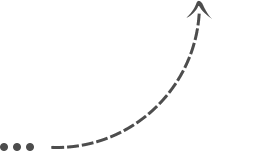
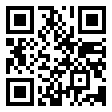

In [5]:
from selenium import webdriver

browser = webdriver.Chrome(executable_path = '/opt/anaconda3/bin/chromedriver')
browser.get("http://music.163.com") 
print(browser.page_source)
#browser.close() 

In [6]:
browser.close() 

## 查找元素
单个元素查找

这里我们通过三种不同的方式去获取响应的元素，第一种是通过id的方式，第二个是CSS选择器，第三种是xpath选择器，结果都是相同的。

![image.png](./images/selenium2.png)


In [10]:
# from selenium import webdriver
browser = webdriver.Chrome()
browser.get("http://music.163.com")
# <input type="text" name="srch" id="srch" class="txt j-flag" value="" style="opacity: 1;">
input_first = browser.find_element_by_id("srch") 
#srch
input_second = browser.find_element_by_css_selector("#srch")
# //*[@id="srch"]
input_third = browser.find_element_by_xpath('//*[@id="srch"]')
print(input_first)
print(input_second)
print(input_third)
browser.close()


<selenium.webdriver.remote.webelement.WebElement (session="ed0d0a0ac3dc97d391cc6b916488f6d3", element="a2bf12e6-e9fe-4fb9-9af6-854bcc3d3539")>
<selenium.webdriver.remote.webelement.WebElement (session="ed0d0a0ac3dc97d391cc6b916488f6d3", element="a2bf12e6-e9fe-4fb9-9af6-854bcc3d3539")>
<selenium.webdriver.remote.webelement.WebElement (session="ed0d0a0ac3dc97d391cc6b916488f6d3", element="a2bf12e6-e9fe-4fb9-9af6-854bcc3d3539")>


## 常用的查找元素方法：

- find_element_by_name
- find_element_by_id
- find_element_by_xpath
- find_element_by_link_text
- find_element_by_partial_link_text
- find_element_by_tag_name
- find_element_by_class_name
- find_element_by_css_selector

In [11]:
# 下面这种方式是比较通用的一种方式：这里需要记住By模块所以需要导入
from selenium.webdriver.common.by import By

In [18]:
browser = webdriver.Chrome()
browser.get("http://music.163.com")
#<input type="text" name="srch" id="srch" class="txt j-flag" value="" style="opacity: 1;">
input_first = browser.find_element(By.ID,"srch")
print(input_first)
browser.close()

<selenium.webdriver.remote.webelement.WebElement (session="2f0c13bf52dac8cba589d2cd7ce234d3", element="0.35054462499434424-1")>


## 多个元素查找

其实多个元素和单个元素的区别，举个例子：find_elements,单个元素是find_element,其他使用上没什么区别，通过其中的一个例子演示：

In [19]:
browser = webdriver.Chrome()
browser.get("http://music.163.com")
lis = browser.find_elements_by_css_selector('body')
print(lis)
browser.close() 

[<selenium.webdriver.remote.webelement.WebElement (session="e8807f76eb4bc9d7c2e9ab5463db6525", element="0.6131512247820263-1")>]


当然上面的方式也是可以通过导入`from selenium.webdriver.common.by import By` 这种方式实现

> lis = browser.find_elements(By.CSS_SELECTOR,'.service-bd li')

同样的在单个元素中查找的方法在多个元素查找中同样存在：
- find_elements_by_name
- find_elements_by_id
- find_elements_by_xpath
- find_elements_by_link_text
- find_elements_by_partial_link_text
- find_elements_by_tag_name
- find_elements_by_class_name
- find_elements_by_css_selector

## 元素交互操作
对于获取的元素调用交互方法

In [12]:
from selenium import webdriver
import time
browser = webdriver.Chrome()

browser.get("https://music.163.com/")
input_str = browser.find_element_by_id('srch')
input_str.send_keys("周杰伦")
time.sleep(3) #休眠，模仿人工搜索
input_str.clear()
input_str.send_keys("林俊杰")
time.sleep(3)
#browser.close()

运行的结果可以看出程序会自动打开Chrome浏览器并打开淘宝输入ipad,然后删除，重新输入MacBook pro，并点击搜索

Selenium所有的api文档：http://selenium-python.readthedocs.io/api.html#module-selenium.webdriver.common.action_chains

## 执行JavaScript
这是一个非常有用的方法，这里就可以直接调用js方法来实现一些操作，
下面的例子是通过登录知乎然后通过js翻到页面底部，并弹框提示

In [13]:
from selenium import webdriver
browser = webdriver.Chrome()
browser.get("https://www.zhihu.com/explore/")
browser.execute_script('window.scrollTo(0, document.body.scrollHeight)')
#browser.execute_script('alert("To Bottom")')
time.sleep(3)
#browser.close()


![discuss.gif](./images/end.png)

```
from selenium import webdriver

browser = webdriver.Chrome()
browser.get("https://www.privco.com/home/login") #需要翻墙打开网址
username = 'fake_username'
password =  'fake_password'
browser.find_element_by_id("username").clear()
browser.find_element_by_id("username").send_keys(username) 
browser.find_element_by_id("password").clear()
browser.find_element_by_id("password").send_keys(password)
browser.find_element_by_css_selector("#login-form > div:nth-child(5) > div > button").click()
```

In [27]:
# url = "https://www.privco.com/private-company/329463"
def download_excel(url):
    browser.get(url)
    name = url.split('/')[-1]
    title = browser.title
    source = browser.page_source
    with open(name+'.html', 'w') as f:
        f.write(source)
    try:
        soup = BeautifulSoup(source, 'html.parser')
        url_new = soup.find('span', {'class', 'profile-name'}).a['href']
        url_excel = url_new + '/export'
        browser.get(url_excel)
    except Exception as e:
        print(url, 'no excel')
        pass
        
    

In [25]:
urls = [ 'https://www.privco.com/private-company/1135789',
            'https://www.privco.com/private-company/542756',
            'https://www.privco.com/private-company/137908',
            'https://www.privco.com/private-company/137138']

In [28]:
for k, url in enumerate(urls):
    print(k)
    try:
        download_excel(url)
    except Exception as e:
        print(url, e)

0
https://www.privco.com/private-company/1135789 no excel
1
https://www.privco.com/private-company/542756 no excel
2
https://www.privco.com/private-company/137908 no excel
3
https://www.privco.com/private-company/137138 no excel
